# 12. Information Retrieval

## Instalacja bibliotek

In [13]:
pip install sentence-transformers


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 268 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 408 kB 20.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Zadanie 1 - Model Przestrzeni Wektorowej

Napisz funkcję, która przyjmuje listę dokumentów i zapytanie, a zwraca listę dokumentów posortowanych według podobieństwa cosinusowego z zapytaniem.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def tf_idf_retrieval(documents: list[str], query: str) -> pd.DataFrame:
    corpus = documents + [query]
    
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    
    cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])[0]
    
    results = pd.DataFrame({
        'Document': documents,
        'Cosine Similarity': cosine_similarities
    })
    
    results = results.sort_values(by='Cosine Similarity', ascending=False).reset_index(drop=True)
    
    return results

documents = [
    "AI in healthcare improves diagnostics and patient care. AI algorithms analyze medical datasets efficiently",
    "AI enhances the e-commerce experience. AI systems recommend products, predict customer preferences, and increase sales. AI also personalizes online shopping",
    "Healthcare and AI are transforming diagnostics. Healthcare diagnostics benefit greatly from AI's ability to process large datasets efficiently",
    "AI applications in healthcare include diagnostics, treatment planning, and patient monitoring. Healthcare systems increasingly rely on AI advancements",
    "AI in transportation is reshaping the future with self-driving cars, traffic optimization, and route planning. AI is making travel safer and more efficient"
]

query = "AI in healthcare diagnostics"
results = tf_idf_retrieval(documents, query)
print(results)


                                            Document  Cosine Similarity
0  AI applications in healthcare include diagnost...           0.443427
1  AI in healthcare improves diagnostics and pati...           0.428852
2  Healthcare and AI are transforming diagnostics...           0.427031
3  AI in transportation is reshaping the future w...           0.140404
4  AI enhances the e-commerce experience. AI syst...           0.126676


## Zadanie 2 - Normalizacja

Napisz funkcję, która normalizuje tekst (zmienia na małe litery, usuwa znaki specjalne i nadmiarowe spacje).

In [4]:
import re

def normalize(text: str) -> str:
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

text = "Information    Retrieval is... FUN!!!"
normalized_text = normalize(text)
print(normalized_text)


information retrieval is fun


## Zadanie 3 - Tokenizacja

Napisz funkcję, która tokenizuje tekst za pomocą biblioteki nltk.

In [7]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

def word_tokenization(doc: str) -> list[str]:
    # Tokenizacja tekstu za pomocą funkcji word_tokenize
    tokens = word_tokenize(doc)
    return tokens

text = "Dr. Smith said, 'Information Retrieval is fascinating!'"
tokens = word_tokenization(text)
print(tokens)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mikolajszechniuk/nltk_data...


['Dr.', 'Smith', 'said', ',', "'Information", 'Retrieval', 'is', 'fascinating', '!', "'"]


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Zadanie 4 - Usuwanie stop-words

Napisz funkcję, która usuwa stop-wordy (słowa nieinformatywne) z listy tokenów.



In [8]:
from nltk.corpus import stopwords
from typing import List

nltk.download('stopwords')

def remove_stop_words(tokens: List[str]) -> List[str]:
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

tokens = ["this", "is", "an", "example", "of", "stop-word", "removal", "for", "information", "retrieval"]
filtered_tokens = remove_stop_words(tokens)
print(filtered_tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mikolajszechniuk/nltk_data...


['example', 'stop-word', 'removal', 'information', 'retrieval']


[nltk_data]   Unzipping corpora/stopwords.zip.


## Zadanie 5 - Embeddingi Zdań (Sentence Embeddings)

Napisz funkcję, która oblicza embeddingi dla listy zdań za pomocą modelu SentenceTransformer. Zobacz jak wyglada wizualizacja tych embeddingów po zmniejszeniu liczby wymiarów.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

def get_sentence_embeddings(sentences: list[str]) -> np.array:
    model = SentenceTransformer('all-MiniLM-L6-v2')  
    embeddings = model.encode(sentences)
    return embeddings

sentences = [
    "Information Retrieval is fascinating",
    "Retrieval systems retrieve documents",
    "I love playing football",
    "Soccer is a great sport",
    "Cooking is an enjoyable activity",
    "Baking is part of cooking",
    "A lovely day for a picnic",
    "Cats are beautiful animals"
]

sentence_embeddings = get_sentence_embeddings(sentences)
print("Embeddings Shape:", sentence_embeddings.shape)

/Library/Python/3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Embeddings Shape: (8, 384)


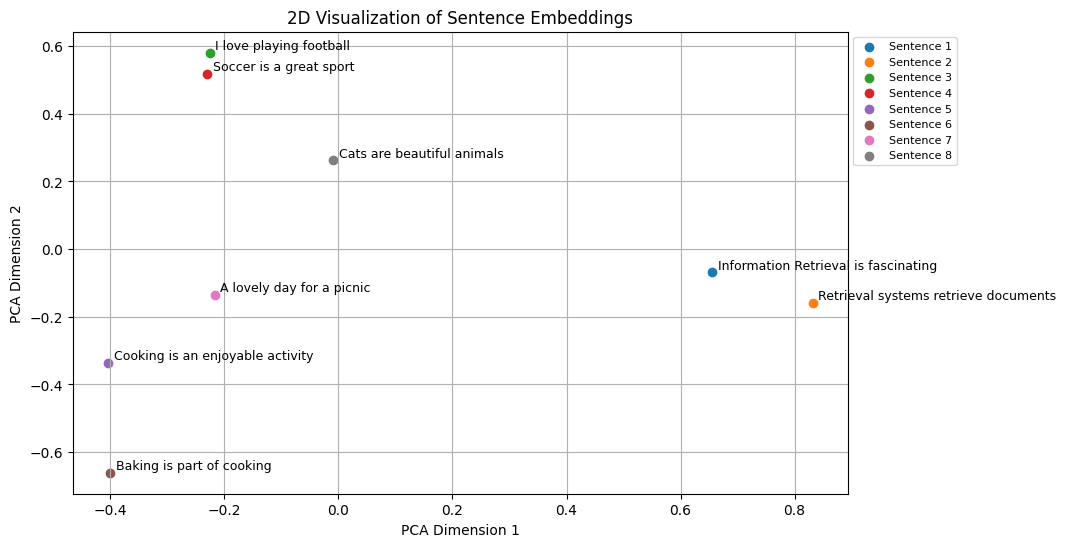

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(sentence_embeddings)

plt.figure(figsize=(10, 6))
for i, sentence in enumerate(sentences):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y, label=f"Sentence {i+1}")
    plt.text(x + 0.01, y + 0.01, sentence, fontsize=9)

plt.title("2D Visualization of Sentence Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
plt.grid()
plt.show()

## Zadanie 6 - Wektorowa Baza Danych

Napisz dwie funkcje. Jedną która tworzy wektorową bazę danych w ChromaDB, dodaje dokumenty i drugą która przeszukuje ją na podstawie zapytania.

In [3]:
from chromadb import Client
from chromadb.config import Settings
import pandas as pd

def create_index(index_name: str, documents: list[str]) -> Client:
    client = Client(Settings(persist_directory=".chromadb", anonymized_telemetry=False))
    
    collection = client.get_or_create_collection(name=index_name)
    
    for i, doc in enumerate(documents):
        collection.add(
            documents=[doc],
            ids=[str(i)]     
        )
    
    return client

def query_index(index: Client, query: str, n_results: int) -> pd.DataFrame:
    collection = index.get_collection(name="NAI")
    
    results = collection.query(
        query_texts=[query],  
        n_results=n_results   
    )
    
    result_df = pd.DataFrame({
        "Document": results["documents"][0],
        "Score": results["distances"][0]
    })
    
    return result_df

documents = [
    "AI is the future of technology",
    "The world is becoming more digital",
    "Data science is the key to innovation",
    "Remote work is the new normal",
    "OpenAI provides powerful tools for developers",
    "I like to code in Python"
]

index_name = "NAI"
index = create_index(index_name, documents)

query = "What is the future of technology?"
results = query_index(index, query, n_results=3)

print(results)


/Users/mikolajszechniuk/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:04<00:00, 16.7MiB/s]


                                Document     Score
0         AI is the future of technology  0.536469
1     The world is becoming more digital  1.005453
2  Data science is the key to innovation  1.145935


## Zadanie 7 - Podział Tekstu (Chunking)

Napisz funkcję, która dzieli tekst na chunki o stałej długości za pomocą CharacterTextSplitter.

In [4]:
from langchain.text_splitter import CharacterTextSplitter

def chunk_text(text: str, chunk_size: int, chunk_overlap: int) -> list[str]:
    splitter = CharacterTextSplitter(
        separator=" ",  
        chunk_size=chunk_size,  
        chunk_overlap=chunk_overlap  
    )

    chunks = splitter.split_text(text)
    return chunks

text = "This is a sample document for text chunking. The text will be split into smaller chunks of fixed length."

chunk_size = 30
chunk_overlap = 10

text_chunks = chunk_text(text, chunk_size, chunk_overlap)

print("Chunks:")
for i, chunk in enumerate(text_chunks):
    print(f"Chunk {i+1}: {chunk}")


Chunks:
Chunk 1: This is a sample document for
Chunk 2: for text chunking. The text
Chunk 3: The text will be split into
Chunk 4: split into smaller chunks of
Chunk 5: chunks of fixed length.


## Zadanie domowe - Image Embeddings

Stwórz system IR, który będzie mógł przeszukiwać tekst książki. Skorzystaj z funkcji z poprzednich zadań.

1.   *Pobierz zawartość strony internetowej.*
2.   Przetwórz tekst (normalizacja, tokenizacja).
3.   Podziel tekst na chunki o stałej długości.
4.   Stwórz bazę danych wektorową w ChromaDB i dodaj chunki.
5.   *Przeszukaj bazę danych wektorową na podstawie zapytania.*




In [16]:
import requests
from bs4 import BeautifulSoup
from langchain.text_splitter import CharacterTextSplitter
from chromadb import Client
from chromadb.config import Settings
import pandas as pd

def extract_text_from_url(url: str) -> str:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])
    return text

def preprocess_text(text: str) -> str:
    text = text.lower().strip()
    return text

def chunk_text(text: str, chunk_size: int, chunk_overlap: int) -> list[str]:
    splitter = CharacterTextSplitter(
        separator=" ", chunk_size=chunk_size, chunk_overlap=chunk_overlap
    )
    chunks = splitter.split_text(text)
    return chunks

def create_index(index_name: str, documents: list[str]) -> Client:
    client = Client(Settings(persist_directory=".chromadb", anonymized_telemetry=False))
    collection = client.get_or_create_collection(name=index_name)
    for i, doc in enumerate(documents):
        collection.add(documents=[doc], ids=[str(i)])
    return client

def query_index(index: Client, query: str, n_results: int) -> pd.DataFrame:
    collection = index.get_collection(name="Recipe")
    results = collection.query(query_texts=[query], n_results=n_results)
    result_df = pd.DataFrame({
        "Document": results["documents"][0],
        "Score": results["distances"][0]
    })
    return result_df

url = "https://www.bbcgoodfood.com/recipes/classic-lasagne"
raw_text = extract_text_from_url(url)

# print(f"Extracted text length: {len(raw_text)}")
# print(f"Extracted text preview: {raw_text[:500]}")

processed_text = preprocess_text(raw_text)

# print(f"Processed text length: {len(processed_text)}")
# print(f"Processed text preview: {processed_text[:500]}")

chunks = chunk_text(processed_text, chunk_size=500, chunk_overlap=50)

# print("First 5 chunks in the database:")
# for chunk in chunks[:5]:
#     print(chunk)


index_name = "Recipe"
index = create_index(index_name, chunks)

collection = index.get_collection(name=index_name)
# print(f"Number of documents in the collection: {collection.count()}")

query = "What ingredients are needed for lasagne?"
results = query_index(index, query, n_results=5)

if results.empty:
    print("No matching results found.")
else:
    print("Results:")
    for i, row in results.iterrows():
        print(f"Document {i+1}: {row['Document'][:100]}... (Score: {row['Score']:.4f})")


Insert of existing embedding ID: 0
Add of existing embedding ID: 0
Insert of existing embedding ID: 1
Add of existing embedding ID: 1
Insert of existing embedding ID: 2
Add of existing embedding ID: 2
Insert of existing embedding ID: 3
Add of existing embedding ID: 3
Insert of existing embedding ID: 4
Add of existing embedding ID: 4
Insert of existing embedding ID: 5
Add of existing embedding ID: 5


Results:
Document 1: pan. add the honey and season to taste. simmer for 20 mins. heat oven to 200c/180c fan/gas 6. to ass... (Score: 0.7505)
Document 2: kids will love to help assemble this easiest ever pasta bake with streaky bacon, beef mince, a crème... (Score: 1.2434)
Document 3: of pasta. put the crème fraîche in a bowl and mix with 2 tbsp water to loosen it and make a smooth p... (Score: 1.3114)
Document 4: and cook over a medium heat for 5 mins, stirring occasionally, until softened. add the garlic and co... (Score: 1.3478)
Document 5: easy-to-make mushroom salad looks really impressive at dinner parties this delicious, easy-to-make m... (Score: 1.3832)


## Zadanie dodatkowe

Napisz dwie funkcje: jedna oblicza embeddingi obrazów za pomocą modelu CLIP, druga znajduje obraz najbardziej podobny do zapytania.

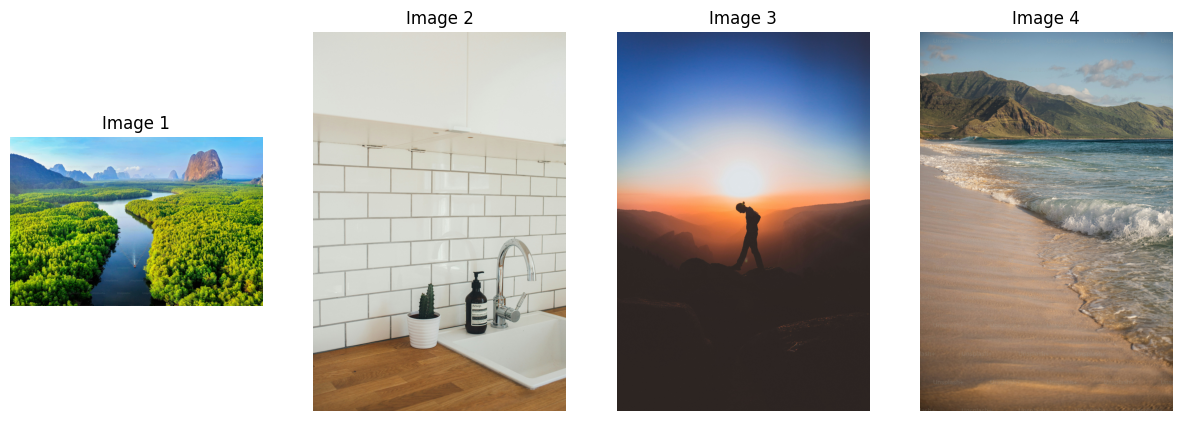

Najbardziej podobny obraz: Image 2


In [2]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import numpy as np
import requests
import matplotlib.pyplot as plt

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

images = [
    "https://plus.unsplash.com/premium_photo-1664300792059-863ccfe55932?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D",
    "https://images.unsplash.com/photo-1523413651479-597eb2da0ad6",
    "https://images.unsplash.com/photo-1506748686214-e9df14d4d9d0",
    "https://plus.unsplash.com/premium_photo-1669750817438-3f7f3112de8d?q=80&w=2788&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
    # "https://images.unsplash.com/photo-1533046642559-16c587d7fc30" nie dziala ten link
]

# query = "Forest"
# query = "Beach"
# query = "People"
# query = "River"
query = "sink"

def download_image(url: str) -> Image:
    return Image.open(requests.get(url, stream=True).raw)

fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
for i, image_url in enumerate(images):
    image = download_image(image_url)
    axs[i].imshow(image)
    axs[i].axis("off")
    axs[i].set_title(f"Image {i+1}")
plt.show()

def get_clip_image_embeddings(images: list[str]) -> np.array:
    image_tensors = []
    for image_url in images:
        image = download_image(image_url)
        inputs = processor(images=image, return_tensors="pt", padding=True)
        image_tensors.append(model.get_image_features(**inputs).detach().numpy()[0])
    return np.array(image_tensors)

def get_clip_text_embeddings(text: str) -> np.array:
    inputs = processor(text=[text], return_tensors="pt", padding=True)
    text_embedding = model.get_text_features(**inputs).detach().numpy()[0]
    return text_embedding

def find_most_similar_image(image_embeddings: np.array, query_embedding: np.array) -> int:
    similarities = np.dot(image_embeddings, query_embedding) / (
        np.linalg.norm(image_embeddings, axis=1) * np.linalg.norm(query_embedding)
    )
    return np.argmax(similarities)

image_embeddings = get_clip_image_embeddings(images)
query_embedding = get_clip_text_embeddings(query)

most_similar_idx = find_most_similar_image(image_embeddings, query_embedding)
print(f"Najbardziej podobny obraz: Image {most_similar_idx + 1}")
